# Taller Vecinos más cercanos (KNN)

Usamos el método de vecinos más cercanos para clasificación. Por un lado, analizamos el Iris Dataset sobre especies de flores. Por el otro lado analizamos la supervivencia en la tragedia del Titanic utilizando diferentes valores de K.

Importamos primero las librerías y paquetes que utilizaremos. Puede importar otros si lo considera útil.

In [1]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Iris Dataset


SKLearn nos provee de algunos conjuntos de datos. Este es el caso del Iris dataset. A continuación vemos cómo se importa este conjunto de datos desde sklearn.

In [2]:
#importar dataset
from sklearn.datasets import load_iris

In [3]:
#Importar iris dataset y separar en data y target
iris = load_iris()
X=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)

Primero separamos el conjunto de datos en Train y Test, en una proporción de 70%, 30%.

In [4]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Importar el classificador KNeighborsClassifier de SKLearn con el nombre *knn*. Usar k=3. Entrenar el clasificador con los datos de entrenamiento.

2. Calcular el exactitud obtenida en los datos de Test, utilizando el método *score* del clasificador.





In [5]:
#Importar KNeighborsClassifier con k=3 con el nombre knn
knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [7]:
#Calcular la exactitud (score) del modelo en los datos test.
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.94


3. Observe los diagramas de dispersión del Iris datset [aquí](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).¿Cree que la exactitud mejorará con un k más pequeño?¿Cree que mejorará con un K más grande? ¿Por qué? Verifique su hipótesis realizando el ejercicio con otros valores de K.


No se evidencia mucha variación en el score cuando se baja el k dado que los datos está muy bien divididos y agrupados. Por esta misma razón, cuando el k crece relativamente poco, sigue dando un buen resultado por la cercanía de datos familiares. Sin embargo, cuando tenemos un k muy grande, el score empeora puesto que ahora sí está tomando en cuenta todo tipo de dato.

## Titanic Dataset
Ahora analizamos la supervivencia en el naufragio del Titanic. El conjunto de datos, así como el diccionario de atributos, puede verlos [aquí](https://www.kaggle.com/competitions/titanic/data).

4. Importar los datos del Titanic de Kaggle. Eliminar las filas con valores ausentes (NaN).

In [8]:
#importar los datos del Titanic Dataset.
titanic_train = pd.read_csv("train.csv")

In [9]:
#Remover filas con valores ausentes.
X = titanic_train.dropna()

5. Explorar el dataset mediante su visualización, el uso de los métodos *head*, *info* y *value_counts* para los Dataframes en pandas y sus columnas. ¿Qué tipo de variables tiene? ¿qué caracteriza a los valores de dichas variables? ¿Qué tipos de datos se usan?

In [10]:
#Explorar el dataset
X.head()
#titanic_train.info()
#titanic_train.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


6. ¿Cuáles considera, de acuero a su intuición, que son las variables más relevantes para predecir la columna 'Survived'? ¿Cuáles considera irrelevantes?¿Por qué? ¿Remueva las columnas que usted considere que no aportarán a las predicciones. **OJO:** ¡Debe remover dichas columnas tando del conjunto de entrenamiento como el de test!
*Observación:* Luego veremos formas de hacer selección de columnas para entrenar modelos de ML. Por ahora es sólo queremos experimentar partiendo de su intuición.

Variables potencialmente relevantes:

  * Pclass: La clase en la que viajaba el pasajero podría estar relacionada con la prioridad de evacuación y, por lo tanto, con la supervivencia.
  * Sex: El género podría ser un factor importante, ya que se observó que en el hundimiento del Titanic, las mujeres tenían más probabilidades de sobrevivir que los hombres.
  * Age: La edad podría estar relacionada con la supervivencia, ya que es probable que se haya dado prioridad a ciertos grupos de edad durante la evacuación.
  * SibSp y Parch: El número de hermanos/cónyuge e hijos/padres a bordo podría estar relacionado con la supervivencia, ya que las familias podrían haber tenido prioridad.
  * Fare: El costo del boleto podría estar relacionado con la clase y, por lo tanto, con la ubicación y la probabilidad de supervivencia.

  Variables potencialmente irrelevantes:

  * PassengerId: Un identificador único para cada pasajero que probablemente no influye en la supervivencia.
  * Name: Los nombres de los pasajeros generalmente no tienen correlación con la supervivencia.
  * Ticket: El número de boleto no parece estar relacionado directamente con la supervivencia.
  * Cabin: La ubicación de la cabina podría estar relacionada con la supervivencia, pero esta columna contiene muchas entradas faltantes y es posible que sea difícil de utilizar.
  * Embarked: No la entendemos.

In [11]:
# Remover columnas irrelevantes del DataFrame X
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
X = X.drop(columns=columns_to_drop, axis=1)

7. Separe la columna objetivo tanto del trainset como del test set. Puede nombrarla y_train, y_test y al resto del dataframe puede llamarlo X_train,X_train tal como es costumbre.

In [12]:
# Separar la columna objetivo.
y = X['Survived']
X = X.drop(columns=['Survived'])

8. Convertimr a dummies las columnas categóricas. Se sugiere usar el parámetro drop_first = True si está trabajando con Getdummies, para que no haya una columna que redunda.

In [13]:
# Convertir a dummies. Usar el parámetro drop_first=True.
X = pd.get_dummies(X, drop_first=True)

In [14]:
#Imprimir info de X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    183 non-null    int64  
 1   Age       183 non-null    float64
 2   SibSp     183 non-null    int64  
 3   Parch     183 non-null    int64  
 4   Fare      183 non-null    float64
 5   Sex_male  183 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 8.8 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

A continuación, entrenamos clasificadores de KNN con diferentes valores de K y visualizamos el cambio entre ellos.

9. Cree un loop mediante el cual entrene un clasificador de KNN para valores de K entre 1 y 100. Calcule sus respectivos scores. Guarde dichos scores en una lista llamada "scores".

In [16]:
from sklearn.metrics import accuracy_score
# Para k entre 1 y 100, entrenar knn en los datos de entrenamiento. Calcular sus respectivos scores
# Guardar los scores en una lista llamada "scores".

# Inicializar una lista para almacenar los scores
scores = []

# Loop para entrenar clasificadores KNN con valores de K entre 1 y 100
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)

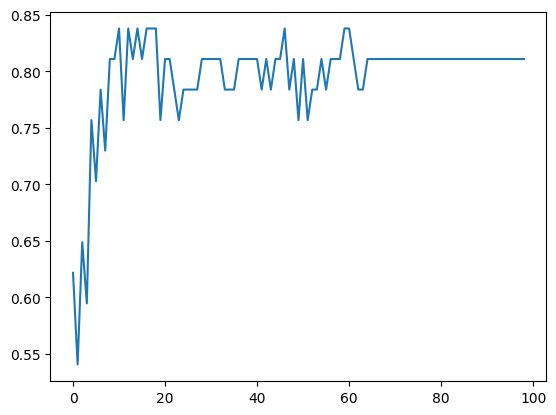

In [17]:
#Graficar scores
plt.plot(scores)

10. ¿Qué se puede concluir a partir de la gráfica anterior?

Pudimos observar cuando el parametro n_neighbors tiene valores pequeños no se logran ajustar correctamente los datos. Ademas, al aumentar este paremetro, se logra observar una mejora significativa en el score.

11. Determinar si las siguientes afirmaciones son verdaderas o falsas. Justificar su respuesta.

- Para cualquier conjunto de datos para clasificación, el score al clasificar con 1-NN siempre será menor o igual que el de 5-NN.  

Falso, puesto que se debe encontrar para cada training set particular. Sin embargo, 1-NN tiende a ser sujeto al sobre ajuste y a verse afectado por ruido en el dataset.

- El tiempo para clasificar un registro del testset con k-NN crece con el tamaño del train set.

Verdadero, ya que siempre que se debe clasificar un nuevo dato, se debe buscar la distancia con cada datapoint en el train set.

## Titanic dataset usando pesos en la distancia.

A continuación usamos clasificadores de KNN dándole pesos a las distancias.

In [18]:
# Weighted k-nn
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)
  print(s)

0.6216216216216216
0.5945945945945946
0.6486486486486487
0.6486486486486487
0.7027027027027027
0.6756756756756757
0.7027027027027027
0.7027027027027027
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7837837837837838
0.7567567567567568
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837

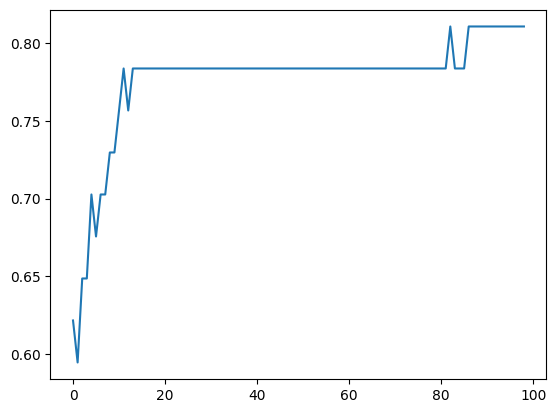

In [19]:
#Graficar
plt.plot(scores)

12. ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? ¿Alguna hipótesis sobre el porqué?

Mientras el clasificador KNN con pesos tenga más neighbors da un mejor score, respecto al clasificador sin pesos. Esto se debe a que este modelo es más propenso al ruido, o por lo menos con los datos del training set.

13. Escriba sus conclusiones del ejercicio.

* En resumen, los resultados obtenidos revelan que la variación en el puntaje es mínima o sobreajustada al disminuir el valor de "k", debido a la alta cohesión y separación de los datos en grupos definidos. Este fenómeno también se observa cuando "k" aumenta ligeramente, ya que aún mantiene una relación con datos familiares cercanos. Sin embargo, cuando "k" adquiere valores muy elevados, se produce un deterioro en el puntaje, ya que se incorporan datos más distantes y heterogéneos en el cálculo. Estos hallazgos resaltan la importancia de elegir un valor apropiado para "k" en el algoritmo de agrupamiento, considerando tanto la estructura de los datos como la interpretación de los resultados finales.

*  La aplicación del algoritmo de clasificación KNN con pesos en las distancias aporta una notable mejora en la estabilidad del modelo. Al asignar pesos a las distancias entre puntos de datos, se logra mitigar el impacto de valores atípicos o ruidosos que podrían perturbar la toma de decisiones del algoritmo. Esto conduce a una mayor robustez en la clasificación, ya que se otorga una importancia diferenciada a las conexiones entre vecinos más cercanos.

*  La inclusión de pesos en las distancias refuerza la capacidad del clasificador KNN para generalizar de manera efectiva y mejorar su capacidad de adaptación a la complejidad inherente de los conjuntos de datos del mundo real.